Vinnie Tiang Wen Ying 22004876
# Section C: Deep Learning Mini Implementation Notebook



# Deep Learning Concept: Backpropagation

Backpropagation is the core learning algorithm used to train neural networks. Throughout the model training process, backpropagation will calculate how much each weight and bias in the network contributes to the total error (loss), then adjusts them to reduce that error, in order to get better prediction output. The loss here is the difference between predicted output and the actual output.

The backpropagation process
1. **Forward Pass**: Make a prediction using current weights and biases.
2. **Loss Calculation**: Measure the difference between predicted and actual output.
3. **Backward Pass**: Compute gradients of the loss with respect to each weight and bias.
4. **Gradient Descent**: Update the weight and bias to reduce the loss.



## Concept Illustration of How a Neural Network **Learns a Simple Formula** using Backpropagation

In this implementation, I will demo using a very simple network architecture (a single-layer perceptron with no hidden layers)

*   Input layer: 1 input value (𝑥)
*   Neuron: 1 neuron with 1 weight (𝑤) and 1 bias (𝑏)
*   Output layer: 1 output value (𝑦̂) (prediction)



I will demo on how this single neuron use backpropagation to learn a linear function

**y = 3x − 2**

where given the input 𝑥, the model should be able to predict the output 3𝑥-2.

Even the simplest neural network can learn useful relationships when trained properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialize Parameters


In [2]:
# Dataset: learning y = 3x - 2
X = 2.0                 # Single input for now, x = 2
y_target = 3 * X - 2    # Target: y = 4

# Initialize weight, bias, learning rate
np.random.seed(42)
w = np.random.randn() # weight
b = np.random.randn() # bias
lr = 0.01   # Learning rate

print(f"Initial weight: {w:.4f}")
print(f"Initial bias: {b:.4f}")
print("\n")
print(f"What we want to learn now:")
print(f"Given input: x = {X}")
print(f"Target output: y = {y_target:.2f}")

Initial weight: 0.4967
Initial bias: -0.1383


What we want to learn now:
Given input: x = 2.0
Target output: y = 4.00


## Step 1 - Forward Pass

In [3]:
# STEP 1: Forward pass to compute prediction
y_pred = w * X + b

print(f"Predicted y: {y_pred:.4f}")
print(f"Target y: {y_target:.4f}")

Predicted y: 0.8552
Target y: 4.0000


## Step 2 - Loss Calculation (Mean Squared Error)

We use **Mean Squared Error (MSE)** as our loss function.

MSE calculate the average squared difference between the predicted output (`ŷ`) and the true output (`y`).  
- If predicted output far from the target, loss will be large.
- If predicted output close to the target, loss will be small.

Our Goal: minimize loss value, so model make better predictions.

In [4]:
# STEP 2: Compute loss using MSE
loss = np.mean((y_target - y_pred) ** 2)
print(f"Loss: {loss:.4f}")
print (f"The lower the loss value, the better the prediction is.")

Loss: 9.8900
The lower the loss value, the better the prediction is.


## Step 3: Backward Pass

Since the loss is high, we need to improve the model by adjusting the weight `w` and bias `b`.

We use backpropagation, which tells us how much each parameter contributed to the error, using calculus (**chain rule**).

---

We break down the effect of each parameter step by step:

First, we calculate the gradient of the loss with respect to the predicted output:
```
dL/d𝑦̂ = -2(y-𝑦̂)
#This comes from the derivative of the MSE loss: L=(y-𝑦̂)^2

```
Then, we compute how the predicted output changes with respect to the weight:
```
d𝑦̂/dw = x
```
Using chain rule, we combine and get:

```
dL/dw = dL/d𝑦̂ × d𝑦̂/dw
= -2(y-𝑦̂) × x
```

Similarly, the predicted output changes with respect to the bias:
```
d𝑦̂/db = 1
```
So the gradient of the loss with respect to the bias is:


```
dL/db = dL/d𝑦̂ × d𝑦̂/db  
      = -2(y - 𝑦̂) × 1  
      = -2(y - 𝑦̂)
```



In [5]:
# STEP 3: Backpropagation (Compute gradients)
dL_dy = -2 * (y_target - y_pred)  # Gradient of loss with respect to prediction, dL/dŷ from MSE
dw = np.sum(dL_dy * X)          # dL/dw using Chain Rule
db = np.sum(dL_dy)              # dL/db using Chain Rule

print(f"Gradient with respect to weight (dw): {dw:.4f}")
print(f"Gradient with respect to bias   (db): {db:.4f}")

Gradient with respect to weight (dw): -12.5793
Gradient with respect to bias   (db): -6.2897


These gradients tell us how much each parameter affects the loss.
In gradient descent, we have to always update the parameter in the opposite direction of the gradient.
- If the gradient is positive, means increasing the parameter increases the loss. So we reduce the parameter.
- If the gradient is negative, means increasing the parameter reduces the loss. So we increase the parameter.

This helps us to move towards lower loss values.


## Step 4: Gradient Descent

In gradient descent, we always move opposite to the gradient to minimize the loss.

One key thing to mention here is the **learning rate (lr)**.

It controls how big a step the model takes when updating the weights and bias during training, and thus controls how fast or slow the model will learn.

- If learning rate is too large, the model might overshoot and fail to converge.
- If learning rate too small, training will be very slow and might get stuck in local minima.

In step 1, I had set lr = 0.01.

This means we update the weight and bias using 1% of the gradient value at every step. This balances the learning as it will not make the updates too aggressive.



In [6]:
## Step 4: Update Parameters using Gradient Descent

# Before updating
w_before = w
b_before = b
y_pred_before = y_pred
loss_before = np.mean((y_target - y_pred_before) ** 2)

# In gradient descent, we always move opposite to the gradient to minimize the loss
w -= lr * dw
b -= lr * db

# After updating
y_pred_after = w * X + b
loss_after = np.mean((y_target - y_pred_after) ** 2)

# Print updated values
print(f"\nUpdated weight: {w:.4f}")
print(f"Updated bias:   {b:.4f}")

# Compare before and after
print("\nComparison Before and After the First Backpropagation Process")
print(f"Weight:     {w_before:.4f} → {w:.4f}")
print(f"Bias:       {b_before:.4f} → {b:.4f}")
print(f"Prediction: {y_pred_before:.4f} → {y_pred_after:.4f}, (we aim to get closer to target y = {y_target:.4f})")
print(f"Loss:       {loss_before:.4f} → {loss_after:.4f}, (loss is reducing)")



Updated weight: 0.6225
Updated bias:   -0.0754

Comparison Before and After the First Backpropagation Process
Weight:     0.4967 → 0.6225
Bias:       -0.1383 → -0.0754
Prediction: 0.8552 → 1.1696, (we aim to get closer to target y = 4.0000)
Loss:       9.8900 → 8.0109, (loss is reducing)


The model learns by adjusting its parameters to reduce the error.



## Let's see how the Model learns in Actual Training Loop (Multiple Epochs)
Every epoch:
1. Takes input x
2. Computes ŷ = w·x + b (forward pass)
3. Compares with true y using MSE loss
4. Calculates gradients (backpropagation)
5. Updates w and b using gradient descent

In [7]:
# Prepare full training dataset
X = np.array([0, 1, 2, 3, 4], dtype=float)
y_target = 3 * X - 2 # Target output: y = 3x - 2

# Reinitialize weight and bias
np.random.seed(42)
w = np.random.randn()
b = np.random.randn()
losses = []

# Training loop
for epoch in range(600):
    # Step 1: Forward pass
    y_pred = w * X + b

    # Step 2: Loss calculation
    loss = np.mean((y_target - y_pred) ** 2)
    losses.append(loss)

    # Step 3: Backpropagation
    dL_dy = -2 * (y_target - y_pred) / len(X)
    dw = np.sum(dL_dy * X)
    db = np.sum(dL_dy)

    # Step 4: Gradient Descent
    w -= lr * dw
    b -= lr * db

    # Print every 100 epochs
    if epoch % 100 == 0 or epoch == 599:
        print(f"Epoch {epoch:3d} | Loss: {loss:.4f} | w: {w:.4f} | b: {b:.4f}")


Epoch   0 | Loss: 22.4229 | w: 0.7226 | b: -0.0754
Epoch 100 | Loss: 0.6024 | w: 2.5325 | b: -0.6673
Epoch 200 | Loss: 0.1819 | w: 2.7431 | b: -1.2676
Epoch 300 | Loss: 0.0549 | w: 2.8588 | b: -1.5975
Epoch 400 | Loss: 0.0166 | w: 2.9224 | b: -1.7788
Epoch 500 | Loss: 0.0050 | w: 2.9574 | b: -1.8785
Epoch 599 | Loss: 0.0015 | w: 2.9764 | b: -1.9328


- We can see at Epoch 0, it is a random start, so we get bad loss.

- Throughout the Epoch to 599th Epoch, we get decreasing loss value, the weight and bias become closer and closer to the ideal w=3, b=-2.


## Visualization

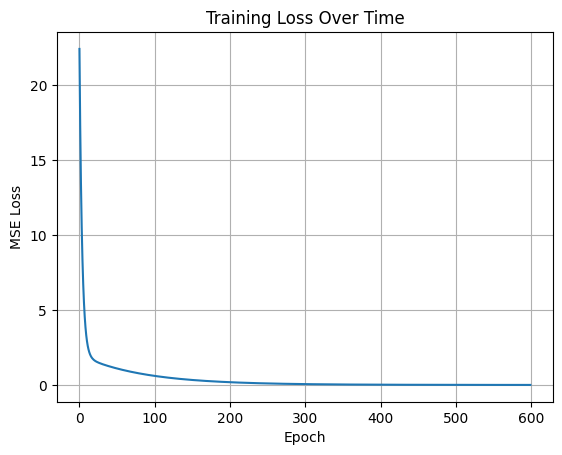

In [8]:
plt.plot(losses)
plt.title("Training Loss Over Time")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [9]:
# Final learned weight and bias
print(f"\nTarget weight : 3.0 | Learned weight: w = {w:.4f}")
print(f"Target bias : -2.0 | Learned bias:   b = {b:.4f}")

print(f"\n\nCompare with the true target function y = 3x - 2")
x_check = 2
y_target_check = 3 * x_check - 2
y_pred_check = w * x_check + b

print(f"\nGiven x = {x_check}")
print(f"True y = {y_target_check:.4f}")
print(f"Predicted y = {y_pred_check:.4f}")


Target weight : 3.0 | Learned weight: w = 2.9764
Target bias : -2.0 | Learned bias:   b = -1.9328


Compare with the true target function y = 3x - 2

Given x = 2
True y = 4.0000
Predicted y = 4.0201


## Conclusion

In this implementation, I had shown the concept of backpropagation using a mini neural network to learn the function **y = 3x − 2**.

We can see that even with just one weight and one bias, the network was able to reduce the error and produce accurate predictions, showing the power of backpropagation in its simplest form.

Through the training loop, the model:
- Performed a **forward pass** to make predictions
- Calculated **loss** using Mean Squared Error (MSE)
- Applied **backpropagation** to compute gradients
- Used **gradient descent** to update the weight and bias

At the end of training, the learned weight and bias closely matched to the target values of **w ≈ 3 and b ≈ -2**. This shows how backpropagation enables learning in neural networks.



---



### Real-World Perspective

In real-world deep learning applications, such as:
- Image recognition (classifying butterflies)
- Natural language processing (chatbots/translation)
- Medical diagnosis (detect tumors from scans)

the same concept apply but at a larger scale. Those models will have millions or billions of parameters, structured in complex architectures. For example,
- Deep feedforward networks
- Convolutional Neural Networks (CNNs) for image data
- Recurrent Neural Networks (RNNs) or Transformers for sequence data

But still, at the core, every single weight in these large models is updated using the backpropagation concept, just like in this tiny one-neuron example.

This simple exercise shows that, if a single neuron can learn a linear rule using backpropagation, so then a deep network can learn complex patterns, by stacking and training many neurons together.